In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import rc

## 데이터 불러오기

In [4]:
df = pd.read_csv('20102018날짜전처리.csv', encoding='cp949')
df = df.drop('Unnamed: 0', axis = 1)

In [5]:
pd.set_option('display.max_columns', None) #df 열 전체 다 보여주게 만드는 것
df.head()

,발생일,발생년도,발생월,발생일자,발생시간,요일,발생지_시군구,사고내용,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도
0,2010-01-01,2010,1,1,00시,금,마포구,경상,서교동,0,0,1,0,차대차,기타,기타,기타,포장,젖음/습기,맑음,단일로,기타단일로,승용차,남,54세,상해없음,이륜차,남,19세,경상
1,2010-01-01,2010,1,1,00시,금,동작구,중상,대방동,0,1,3,0,차대차,추돌,진행중 추돌,안전거리 미확보,포장,서리/결빙,맑음,단일로,기타단일로,승합차,남,57세,상해없음,승용차,남,39세,중상
2,2010-01-01,2010,1,1,00시,금,관악구,경상,신림동,0,0,2,0,차대차,추돌,진행중 추돌,기타,포장,서리/결빙,흐림,단일로,기타단일로,승용차,남,51세,경상,승용차,남,58세,경상
3,2010-01-01,2010,1,1,00시,금,강서구,경상,화곡동,0,0,1,0,차대차,기타,기타,안전거리 미확보,포장,건조,맑음,교차로,교차로부근,승용차,남,56세,상해없음,승용차,남,55세,경상
4,2010-01-01,2010,1,1,00시,금,구로구,경상,구로동,0,0,2,0,차대차,정면충돌,정면충돌,신호위반,포장,건조,맑음,교차로,교차로내,승용차,남,33세,상해없음,승용차,남,55세,경상


변수 추가하기

In [6]:
df['발생일_시간'] = df['발생일']+" "+df['발생시간']
df['발생일_시간_시군구'] = df['발생일']+" "+df['발생시간']+" "+df['발생지_시군구']
df['부상자수'] = df['사망자수']+df['중상자수']+df['경상자수']+df['부상신고자수']
df['사고건수'] = 1

발생일_시간별 데이터 그룹화

In [20]:
new_df = df.groupby(['발생일_시간', '요일', '발생년도','발생월','발생일자']).sum()[['사망자수', '중상자수', '부상신고자수', '사고건수', '부상자수']]
new_df = new_df.reset_index(drop=False) 
new_df = new_df.reindex(columns = ['발생일_시간','사고건수', '발생년도', '발생월', '발생일자', '요일','부상자수','사망자수', '중상자수', '부상신고자수'])

In [21]:
new_df.head()

,발생일_시간,사고건수,발생년도,발생월,발생일자,요일,부상자수,사망자수,중상자수,부상신고자수
0,2010-01-01 00시,9,2010,1,1,0,14,1,3,0
1,2010-01-01 01시,11,2010,1,1,0,32,0,5,4
2,2010-01-01 02시,8,2010,1,1,0,15,0,2,2
3,2010-01-01 03시,10,2010,1,1,0,29,0,13,0
4,2010-01-01 04시,6,2010,1,1,0,13,1,1,0


문자열 데이터 -> 정수형 데이터

In [9]:
#연령 데이터
def age_to_num(df):
    for c, i in enumerate(df):
        if i == '불명':
            df[c] = '0세'
    df = [int(i[:-1]) for i in df]
    return df

df['가해자연령'] = age_to_num(df['가해자연령']) 
df['피해자연령'] = age_to_num(df['피해자연령'])

<ipython-input-9-a7fe6b2d11ab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = '0세'


In [10]:
#시간 데이터
df['발생시간'] = age_to_num(df['발생시간']) 

In [11]:
#결측치 대체
df = df.fillna('결측치')

In [25]:
new_df1 = df
new_df1.head()

,발생일,발생년도,발생월,발생일자,발생시간,요일,발생지_시군구,사고내용,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,발생일_시간,발생일_시간_시군구,부상자수,사고건수
0,2010-01-01,2010,1,1,0,0,12,0,서교동,0,0,1,0,1,기타,1,3,1,4,2,단일로,7,6,1,54,4,12,1,19,0,2010-01-01 00시,2010-01-01 00시 마포구,1,1
1,2010-01-01,2010,1,1,0,0,11,3,대방동,0,1,3,0,1,추돌,12,6,1,2,2,단일로,7,7,1,57,4,7,1,39,6,2010-01-01 00시,2010-01-01 00시 동작구,4,1
2,2010-01-01,2010,1,1,0,0,4,0,신림동,0,0,2,0,1,추돌,12,3,1,2,5,단일로,7,6,1,51,0,7,1,58,0,2010-01-01 00시,2010-01-01 00시 관악구,2,1
3,2010-01-01,2010,1,1,0,0,3,0,화곡동,0,0,1,0,1,기타,1,6,1,0,2,교차로,3,6,1,56,4,7,1,55,0,2010-01-01 00시,2010-01-01 00시 강서구,1,1
4,2010-01-01,2010,1,1,0,0,6,0,구로동,0,0,2,0,1,정면충돌,9,5,1,0,2,교차로,2,6,1,33,4,7,1,55,0,2010-01-01 00시,2010-01-01 00시 구로구,2,1


In [26]:
#범주형 데이터 정수형으로 변환
for i in ['요일', '발생지_시군구', '사고내용', '사고유형_대분류', '사고유형', '가해자법규위반', '노면상태_대분류', '노면상태', '기상상태', '도로형태', '가해자차종', '가해성별', '가해자신체상해정도', '피해자차종', '피해자성별', '피해자신체상해정도']:
    mapping = {label: idx for idx, label in enumerate(np.unique(df[i]))}
    print(mapping)
    new_df1[i] = new_df1[i].map(mapping)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}
{0: 0, 1: 1}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12}
{0: 0, 1: 1, 2: 2}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15}
{0: 0, 1: 1, 2: 2, 3: 3}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


In [27]:
col = ['발생지_시군구','사고내용', '사고유형_대분류', '사고유형','가해자법규위반', '노면상태_대분류', '노면상태', '기상상태', '도로형태', 
       '가해자차종','가해성별', '가해자연령', '가해자신체상해정도', '피해자차종', '피해자성별', '피해자연령', '피해자신체상해정도', '사고건수']
new_df2 = new_df1.groupby(['요일', '발생년도','발생월','발생일자','발생시간']).sum()[col]
new_df2 = new_df2.reset_index(drop=False)

In [39]:
col = ['사고내용', '사고유형_대분류', '사고유형','가해자법규위반', '노면상태_대분류', '노면상태', '기상상태', '도로형태', 
       '가해자차종','가해성별', '가해자연령', '가해자신체상해정도', '피해자차종', '피해자성별', '피해자연령', '피해자신체상해정도', '사고건수']
new_df3 = new_df1.groupby(['발생지_시군구', '발생년도']).sum()[col]
new_df3 = new_df3.reset_index(drop=False)

In [40]:
new_df3

,발생지_시군구,발생년도,사고내용,사고유형_대분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도,사고건수
0,0,2010,3754,2877,39011,21266,3544,1983,7661,20684,22864,3912,147633,13102,26258,5062,139666,7521,3551
1,0,2011,3444,2841,33564,21860,3553,1951,7548,20953,22944,3965,151153,13273,25882,5216,141591,7162,3562
2,0,2012,3853,3067,30886,23483,3836,2009,8103,22443,24778,4230,163676,14063,28066,5549,155709,7922,3843
3,0,2013,3563,2872,27592,22135,3606,1861,7819,20307,23408,4036,154733,13244,26249,5219,148129,7491,3610
4,0,2014,3534,2857,28054,22177,3617,1318,7657,20217,23744,4027,157297,12810,26359,5532,148549,7885,3624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,24,2014,1936,1249,13259,9501,1621,568,3458,8500,11841,1812,72698,5629,12630,2442,68562,4344,1622
221,24,2015,1864,1288,17152,10004,1721,583,3636,8749,12858,1892,77162,5873,13407,2655,72679,4276,1722
222,24,2016,1393,1150,15378,8949,1534,447,3212,8246,11198,1708,71386,5179,12009,2287,67724,3288,1535
223,24,2017,1674,1257,14968,9211,1639,399,3434,7969,11837,1843,75079,5625,12830,2540,72389,3884,1639


## 모델 학습

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


def data_split(data, feature_names):
    X_train = data[(data['발생년도']<2018)][feature_names]
    X_test = data[(data['발생년도']==2018)][feature_names]
    y_train = data[(data['발생년도']<2018)]['사고건수']
    y_test = data[(data['발생년도']==2018)]['사고건수']
    y_test= y_test.reset_index(drop=True)
    
    return X_train, X_test, y_train, y_test


def forest_fit():
    forest = RandomForestRegressor(n_estimators=100, 
                                criterion='mse', 
                                random_state=1, 
                                n_jobs=-1)
    forest.fit(X_train, y_train)
    y_train_pred = forest.predict(X_train)
    y_test_pred = forest.predict(X_test)

    print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
      mean_squared_error(y_train, y_train_pred),
      mean_squared_error(y_test, y_test_pred)))
    print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
          r2_score(y_train, y_train_pred),
          r2_score(y_test, y_test_pred)))

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(30, 10))
    plt.plot(y_test[:300], label = 'real')
    plt.plot(y_test_pred[:300], label = 'pred')
    plt.legend(fontsize = 20)
    plt.show()

    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

    scores = cross_val_score(estimator=forest,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
    print('CV 정확도 점수: %s' % scores)
    print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


def lr_fit():
    lr = LinearRegression()

    lr.fit(X_train, y_train)
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)

    print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
      mean_squared_error(y_train, y_train_pred),
      mean_squared_error(y_test, y_test_pred)))
    print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
          r2_score(y_train, y_train_pred),
          r2_score(y_test, y_test_pred)))

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(30, 10))
    plt.plot(y_test[:300], label = 'real')
    plt.plot(y_test_pred[:300], label = 'pred')
    plt.legend(fontsize = 20)
    plt.show()

    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

    scores = cross_val_score(estimator=lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
    print('CV 정확도 점수: %s' % scores)
    print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))    

  
    
def lr_log_fit():
    lr = LinearRegression()

    y_train_log = np.log1p(y_train)
    y_test_log = np.log1p(y_test)
    lr.fit(X_train, y_train_log)
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    

    print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
      mean_squared_error(np.exp(y_train_log),np.exp(y_train_pred)),
      mean_squared_error(np.exp(y_test_log),np.exp(y_test_pred))))
    print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
          r2_score(np.exp(y_train_log),np.exp(y_train_pred)),
          r2_score(np.exp(y_test_log),np.exp(y_test_pred))))

    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(30, 10))
    plt.plot(y_test[:300], label = 'real')
    plt.plot(np.exp(y_test_pred)[:300], label = 'pred')
    plt.legend(fontsize = 20)
    plt.show()

    k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
    
    scores = cross_val_score(estimator=lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
    print('CV 정확도 점수: %s' % scores)
    print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

1차 모델 학습 : 발생년도, 발생월, 발생일자

In [14]:
# X_test = new_df[(new_df['발생년도'] == 2018)].drop('사고건수', axis=1)
# y_test = new_df[(new_df['발생년도'] == 2018)]['사고건수']
# y_test= y_test.reset_index(drop=True)

# y_train = new_df[(new_df['발생년도'] < 2019)]['사고건수']

lr
훈련 MSE: 6.948, 테스트 MSE: 7.048
훈련 R^2: 0.009, 테스트 R^2: 0.002


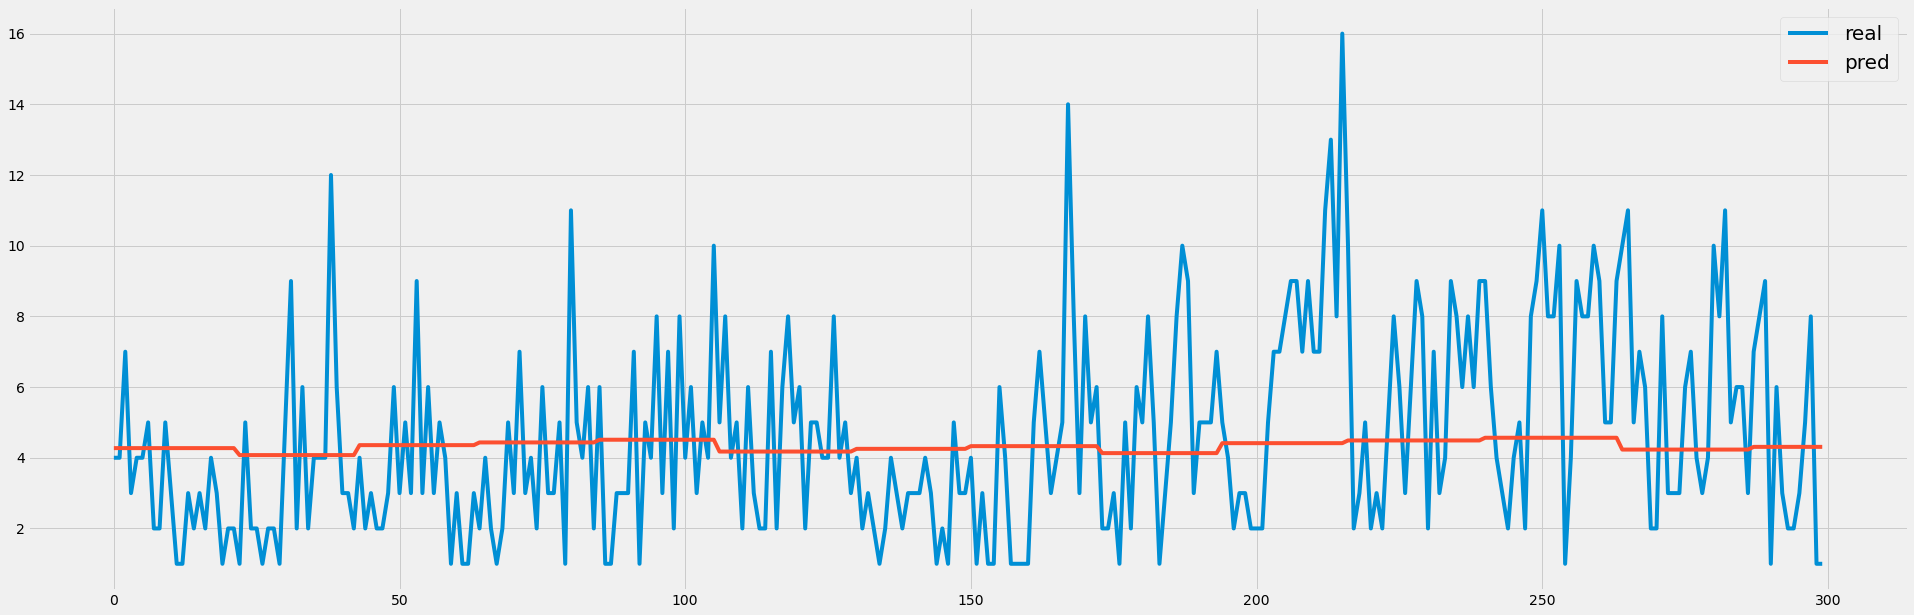

CV 정확도 점수: [ 0.00334988  0.00667927  0.01350322  0.00497291 -0.00507738  0.01379476
  0.00744274  0.00883249  0.00727538  0.00056485]
CV 정확도: 0.006 +/- 0.005
----------------------------------------------------
lr_log
훈련 MSE: 7.296, 테스트 MSE: 7.327
훈련 R^2: -0.041, 테스트 R^2: -0.038


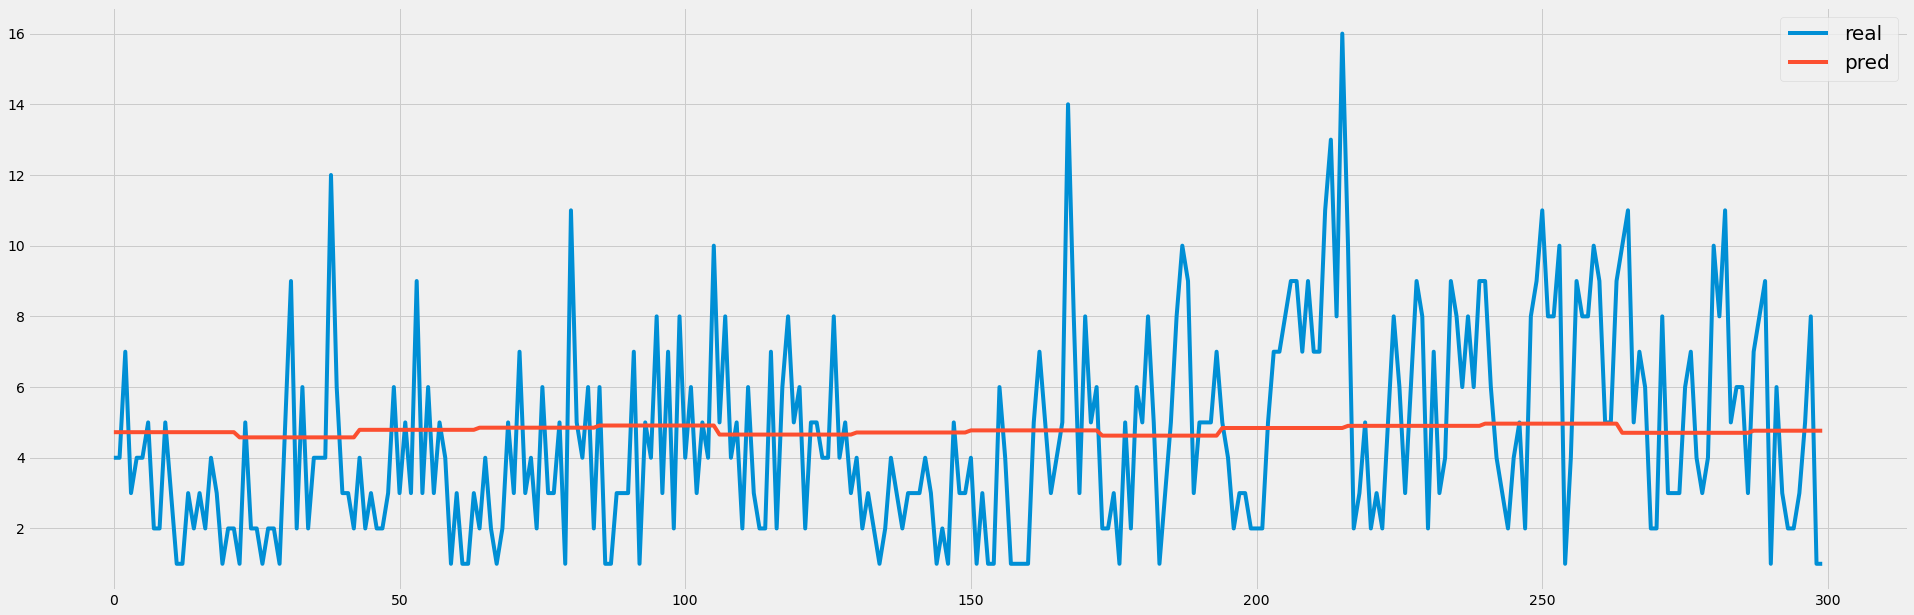

CV 정확도 점수: [ 0.00334988  0.00667927  0.01350322  0.00497291 -0.00507738  0.01379476
  0.00744274  0.00883249  0.00727538  0.00056485]
CV 정확도: 0.006 +/- 0.005
----------------------------------------------------
forest
훈련 MSE: 6.305, 테스트 MSE: 7.061
훈련 R^2: 0.100, 테스트 R^2: 0.000


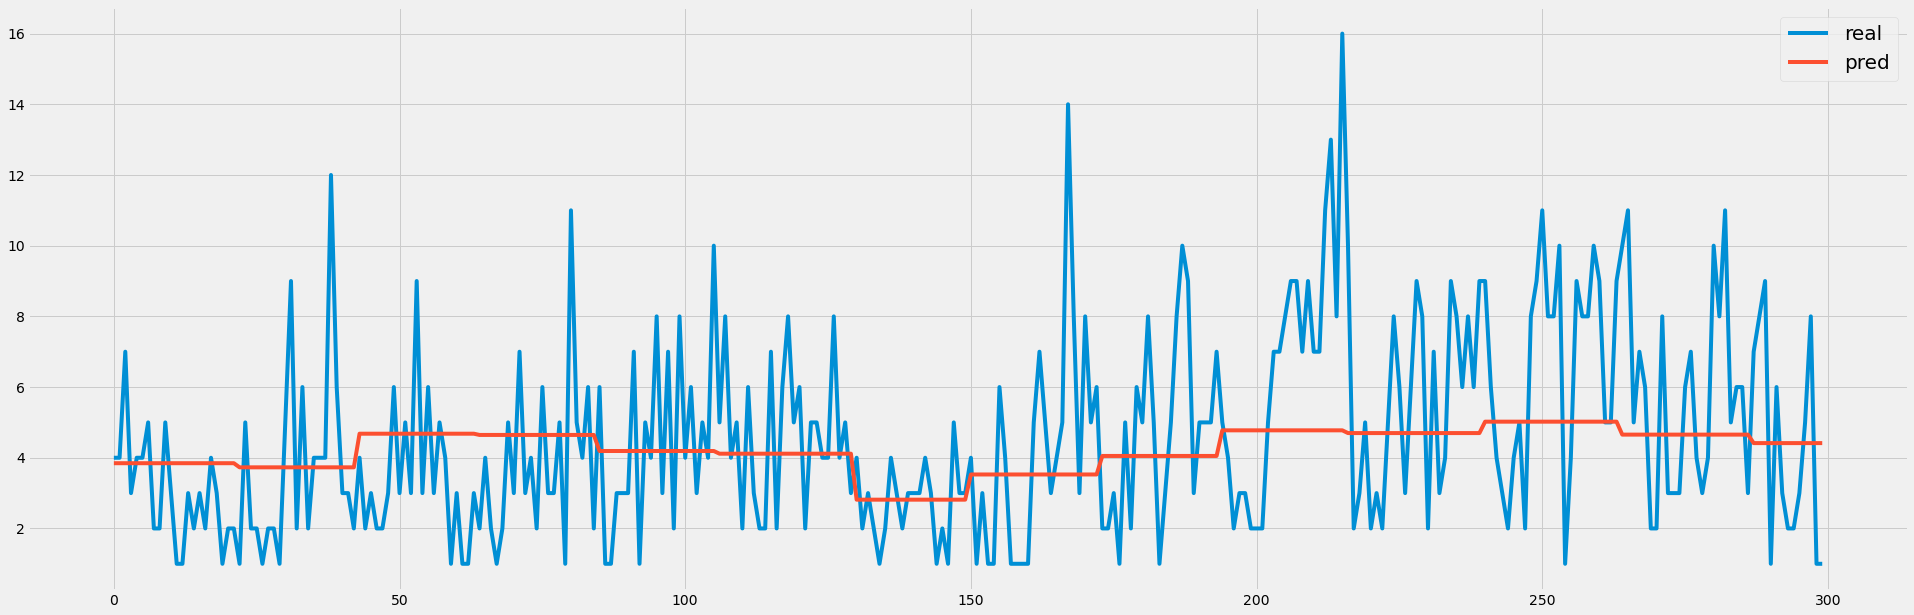

CV 정확도 점수: [-0.0175884  -0.01818056 -0.00853148 -0.00498062 -0.06924697  0.01519956
  0.01749395  0.00937743  0.00864578 -0.01186006]
CV 정확도: -0.008 +/- 0.024


In [24]:
fnames = ['발생년도', '발생월', '발생일자', '요일']
X_train, X_test, y_train, y_test = data_split(new_df, fnames)

print('lr')
lr_fit()
print('----------------------------------------------------')
print('lr_log')
lr_log_fit()
print('----------------------------------------------------')
print('forest')
forest_fit()

2차 모델학습: 랜덤 포레스트로만 진행
[요일, 발생년도, 월, 일자, 시간] 그룹화 

lr
훈련 MSE: 0.006, 테스트 MSE: 0.004
훈련 R^2: 0.999, 테스트 R^2: 0.999


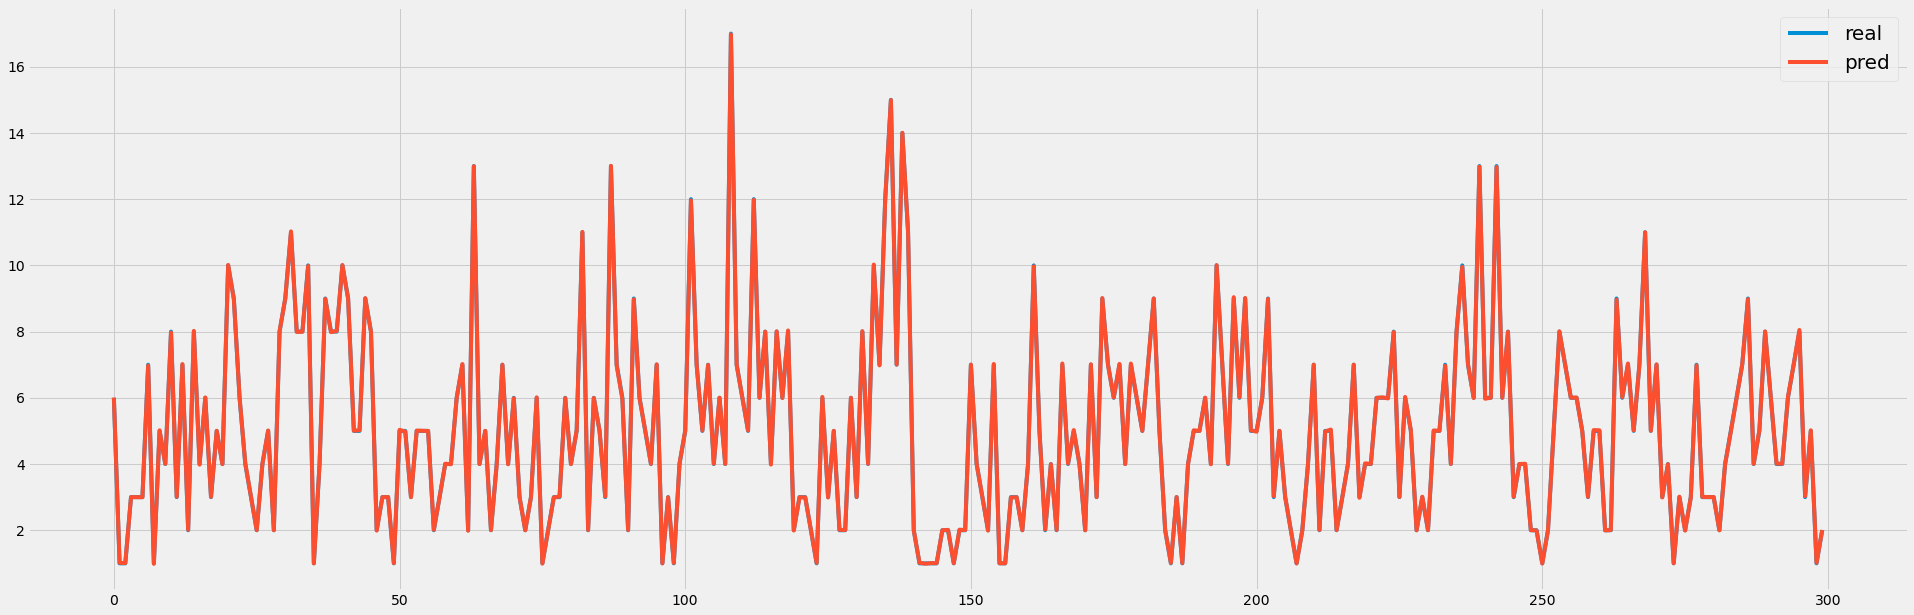

CV 정확도 점수: [0.99916972 0.999373   0.9993011  0.99898831 0.99911967 0.99922417
 0.99892595 0.99918515 0.99898381 0.99920204]
CV 정확도: 0.999 +/- 0.000
----------------------------------------------------
lr_log
훈련 MSE: 2.401, 테스트 MSE: 2.562
훈련 R^2: 0.657, 테스트 R^2: 0.637


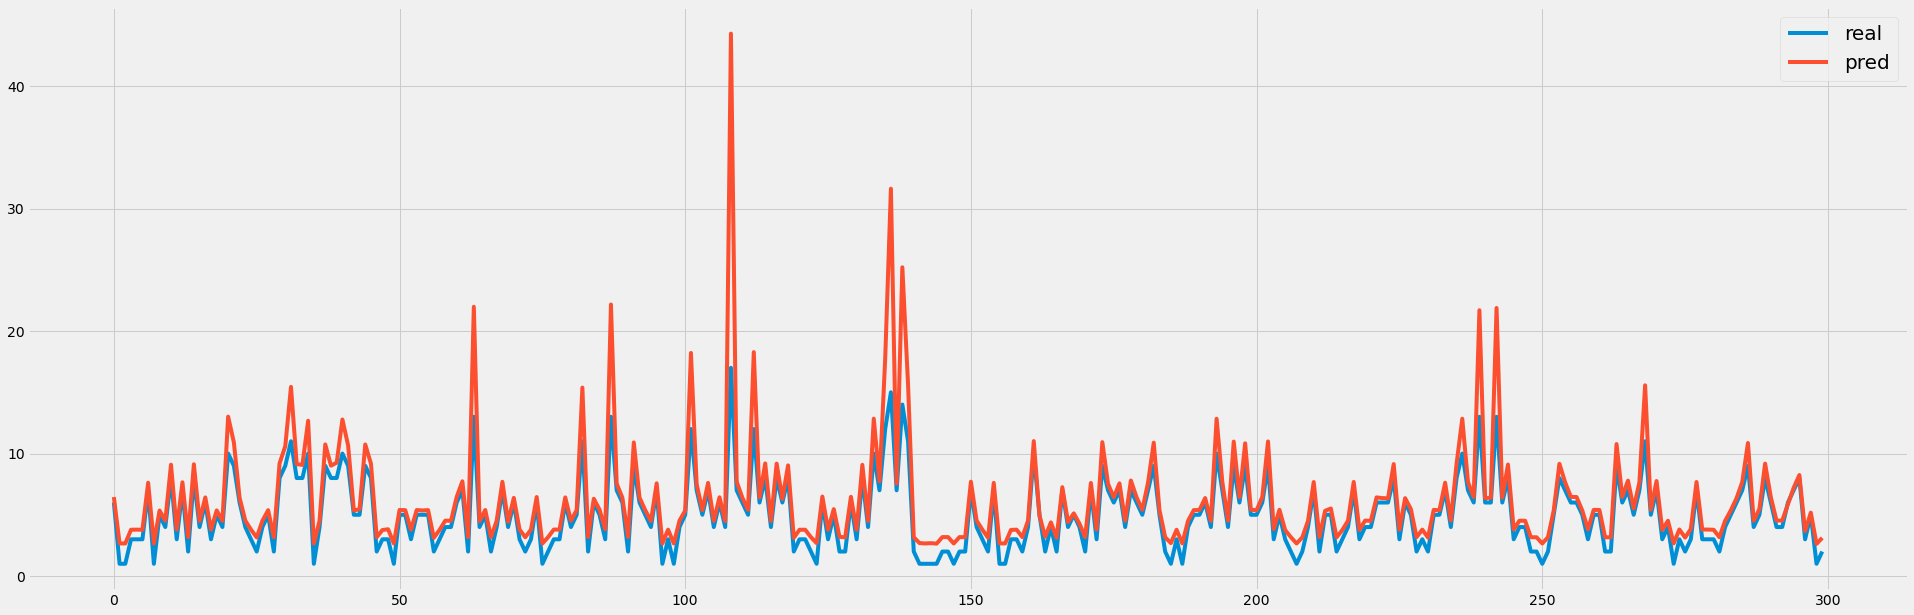

CV 정확도 점수: [0.99916972 0.999373   0.9993011  0.99898831 0.99911967 0.99922417
 0.99892595 0.99918515 0.99898381 0.99920204]
CV 정확도: 0.999 +/- 0.000
----------------------------------------------------
forest
훈련 MSE: 0.000, 테스트 MSE: 0.002
훈련 R^2: 1.000, 테스트 R^2: 1.000


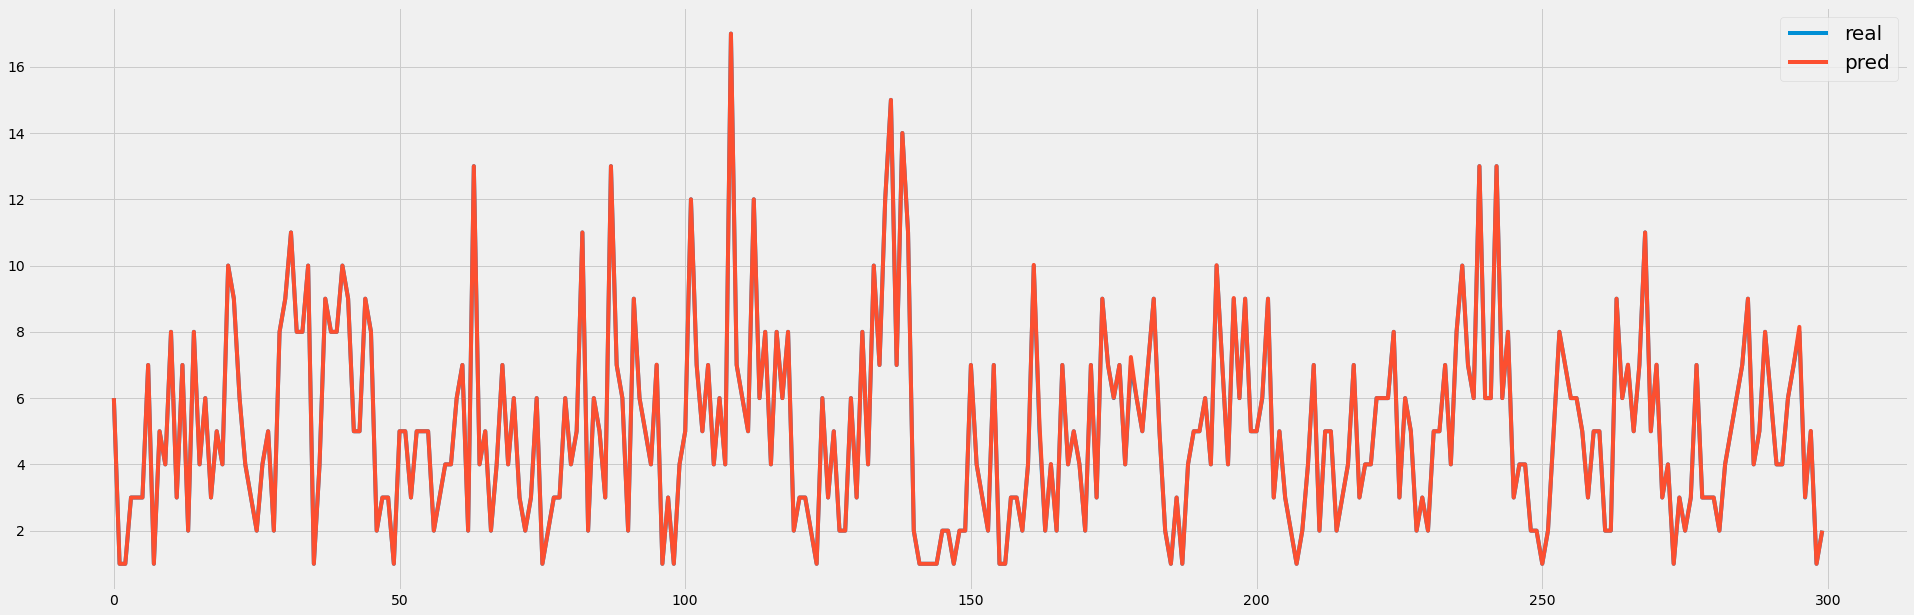

CV 정확도 점수: [0.99955785 0.99964178 0.99959952 0.99953924 0.99944846 0.99965245
 0.99940475 0.99939045 0.99947741 0.99948658]
CV 정확도: 1.000 +/- 0.000


In [30]:
feature_names = ['요일', '발생년도', '발생월', '발생일자', '사고내용', '사고유형_대분류', '사고유형',
       '가해자법규위반', '노면상태_대분류', '노면상태', '기상상태', '도로형태']
X_train, X_test, y_train, y_test = data_split(new_df2, feature_names)

print('lr')
lr_fit()
print('----------------------------------------------------')
print('lr_log')
lr_log_fit()
print('----------------------------------------------------')
print('forest')
forest_fit()

훈련 MSE: 0.001, 테스트 MSE: 0.004
훈련 R^2: 1.000, 테스트 R^2: 0.999


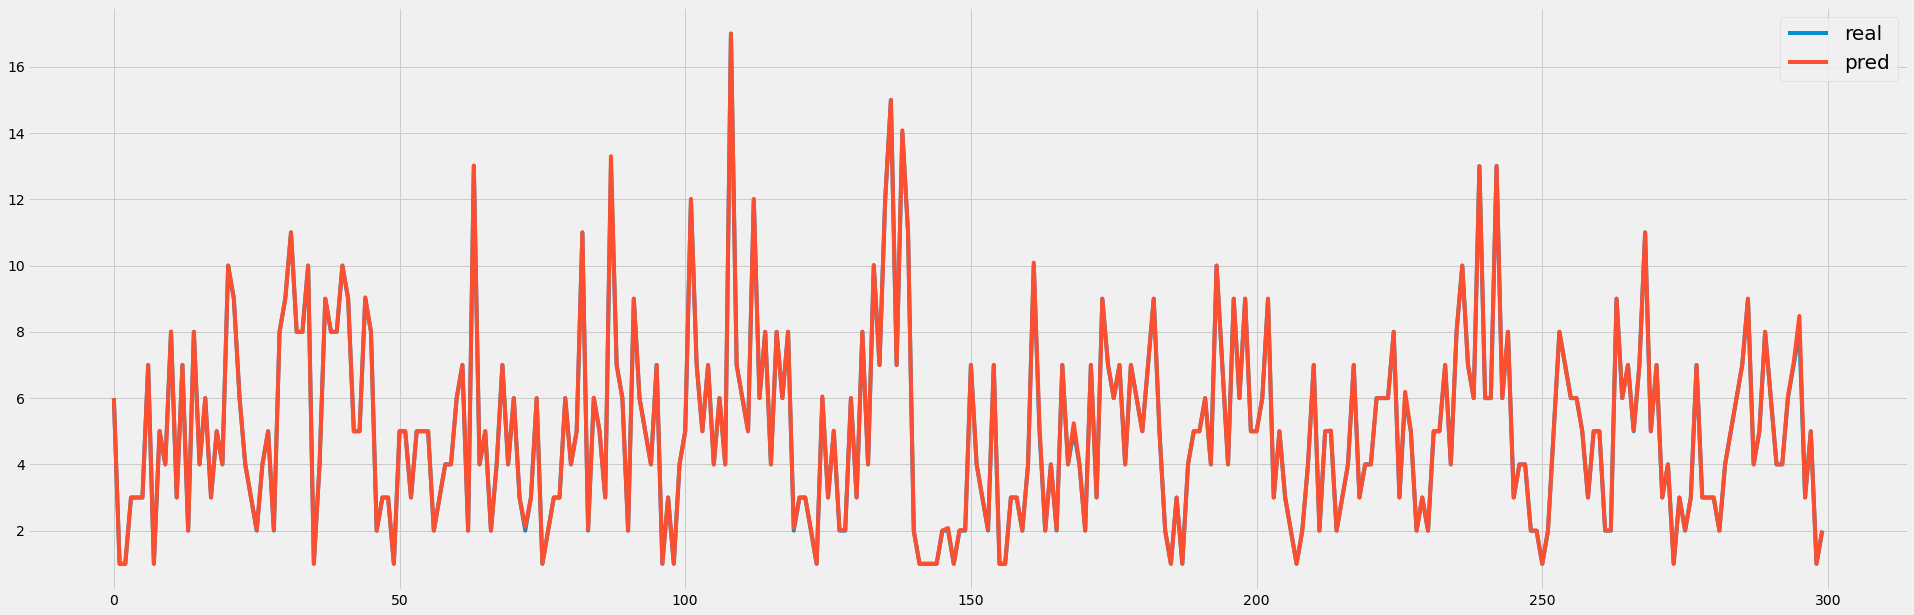

CV 정확도 점수: [0.99930231 0.9995183  0.99940429 0.9993206  0.99933991 0.99954439
 0.9990592  0.99934692 0.99938383 0.99933957]
CV 정확도: 0.999 +/- 0.000


In [36]:
feature_names = ['요일', '발생년도', '발생월', '발생일자', '노면상태_대분류', '노면상태', '기상상태', '도로형태']
X_train, X_test, y_train, y_test = data_split(new_df2, feature_names)

forest_fit()

In [ ]:
feature_names = ['요일', '발생년도', '발생월', '발생일자', '노면상태_대분류', '노면상태', '기상상태', '도로형태', '사고건수']
X_train, X_test, y_train, y_test = data_split(new_df2, feature_names)
forest_fit()

In [31]:
test = pd.read_csv('test.csv')
test.head()

,발생일,발생년도,발생월,발생일자,발생시간,요일,발생지_시군구,사고내용,법정동명,사망자수,중상자수,경상자수,부상신고자수,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,노면상태_대분류,노면상태,기상상태,도로형태_대분류,도로형태,가해자차종,가해성별,가해자연령,가해자신체상해정도,피해자차종,피해자성별,피해자연령,피해자신체상해정도
0,2010-01-02,2010,1,2,16시,토,영등포구,경상,당산동,0,0,3,0,차대차,추돌,주정차중 추돌,안전거리 미확보,포장,서리/결빙,흐림,단일로,교량위,승용차,남,58세,상해없음,승용차,남,56세,경상
1,2010-01-02,2010,1,2,16시,토,마포구,경상,성산동,0,0,1,0,차대차,기타,기타,안전거리 미확보,포장,건조,맑음,교차로,교차로부근,승용차,남,28세,상해없음,승용차,여,29세,경상
2,2010-01-02,2010,1,2,16시,토,성북구,경상,길음동,0,0,1,0,차대차,추돌,진행중 추돌,안전운전 의무 불이행,포장,건조,맑음,단일로,횡단보도부근,승용차,남,56세,상해없음,승용차,남,51세,경상
3,2010-01-02,2010,1,2,17시,토,관악구,경상,신림동,0,0,1,0,차대차,측면충돌,측면충돌,신호위반,포장,건조,맑음,교차로,교차로내,승용차,남,69세,상해없음,승용차,여,46세,경상
4,2010-01-02,2010,1,2,17시,토,도봉구,경상,창동,0,0,3,0,차대차,추돌,주정차중 추돌,안전운전 의무 불이행,포장,건조,맑음,단일로,횡단보도부근,승합차,남,37세,상해없음,승용차,남,55세,경상


In [32]:
test['사고건수'] = 1
test['가해자연령'] = age_to_num(test['가해자연령']) 
test['피해자연령'] = age_to_num(test['피해자연령'])
test['발생시간'] = age_to_num(test['발생시간']) 

test = test.fillna('결측치')

#범주형 데이터 정수형으로 변환
for i in ['요일', '발생지_시군구', '사고내용', '사고유형_대분류', '사고유형', '가해자법규위반', '노면상태_대분류', '노면상태', '기상상태', '도로형태', '가해자차종', '가해성별', '가해자신체상해정도', '피해자차종', '피해자성별', '피해자신체상해정도']:
    mapping = {label: idx for idx, label in enumerate(np.unique(test[i]))}
    print(mapping)
    test[i] = test[i].map(mapping)
    
col = ['발생지_시군구','사고내용', '사고유형_대분류', '사고유형','가해자법규위반', '노면상태_대분류', '노면상태', '기상상태', '도로형태', 
       '가해자차종','가해성별', '가해자연령', '가해자신체상해정도', '피해자차종', '피해자성별', '피해자연령', '피해자신체상해정도', '사고건수']
new_test = test.groupby(['요일', '발생년도','발생월','발생일자','발생시간']).sum()[col]
new_test = new_test.reset_index(drop=False)

{'금': 0, '목': 1, '수': 2, '월': 3, '일': 4, '토': 5, '화': 6}
{'강남구': 0, '강동구': 1, '강북구': 2, '강서구': 3, '관악구': 4, '광진구': 5, '구로구': 6, '금천구': 7, '노원구': 8, '도봉구': 9, '동대문구': 10, '동작구': 11, '마포구': 12, '서대문구': 13, '서초구': 14, '성동구': 15, '성북구': 16, '송파구': 17, '양천구': 18, '영등포구': 19, '용산구': 20, '은평구': 21, '종로구': 22, '중구': 23, '중랑구': 24}
{'경상': 0, '부상신고': 1, '사망': 2, '중상': 3}
{'차대사람': 0, '차대차': 1, '차량단독': 2}
{'공작물충돌': 0, '기타': 1, '길가장자리구역통행중': 2, '도로이탈 추락': 3, '보도통행중': 4, '전도전복': 5, '정면충돌': 6, '주/정차차량 충돌': 7, '주정차중 추돌': 8, '진행중 추돌': 9, '차도통행중': 10, '측면충돌': 11, '횡단중': 12}
{'과속': 0, '교차로 통행방법 위반': 1, '기타': 2, '보행자 보호의무 위반': 3, '신호위반': 4, '안전거리 미확보': 5, '안전운전 의무 불이행': 6, '중앙선 침범': 7}
{'비포장': 0, '포장': 1}
{'건조': 0, '기타': 1, '서리/결빙': 2, '적설': 3, '젖음/습기': 4}
{'기타/불명': 0, '눈': 1, '맑음': 2, '비': 3, '안개': 4, '흐림': 5}
{'고가도로위': 0, '교량위': 1, '교차로내': 2, '교차로부근': 3, '기타/불명': 4, '기타단일로': 5, '터널안': 6, '횡단보도부근': 7, '횡단보도상': 8}
{'건설기계': 0, '불명': 1, '승용차': 2, '승합차': 3, '원동기장치자전거': 4, '이륜차': 5, '자전거': 6, '특수차': 7, '화물차':

<ipython-input-9-a7fe6b2d11ab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = '0세'


훈련 MSE: 0.001, 테스트 MSE: 0.016
훈련 R^2: 1.000, 테스트 R^2: 0.997


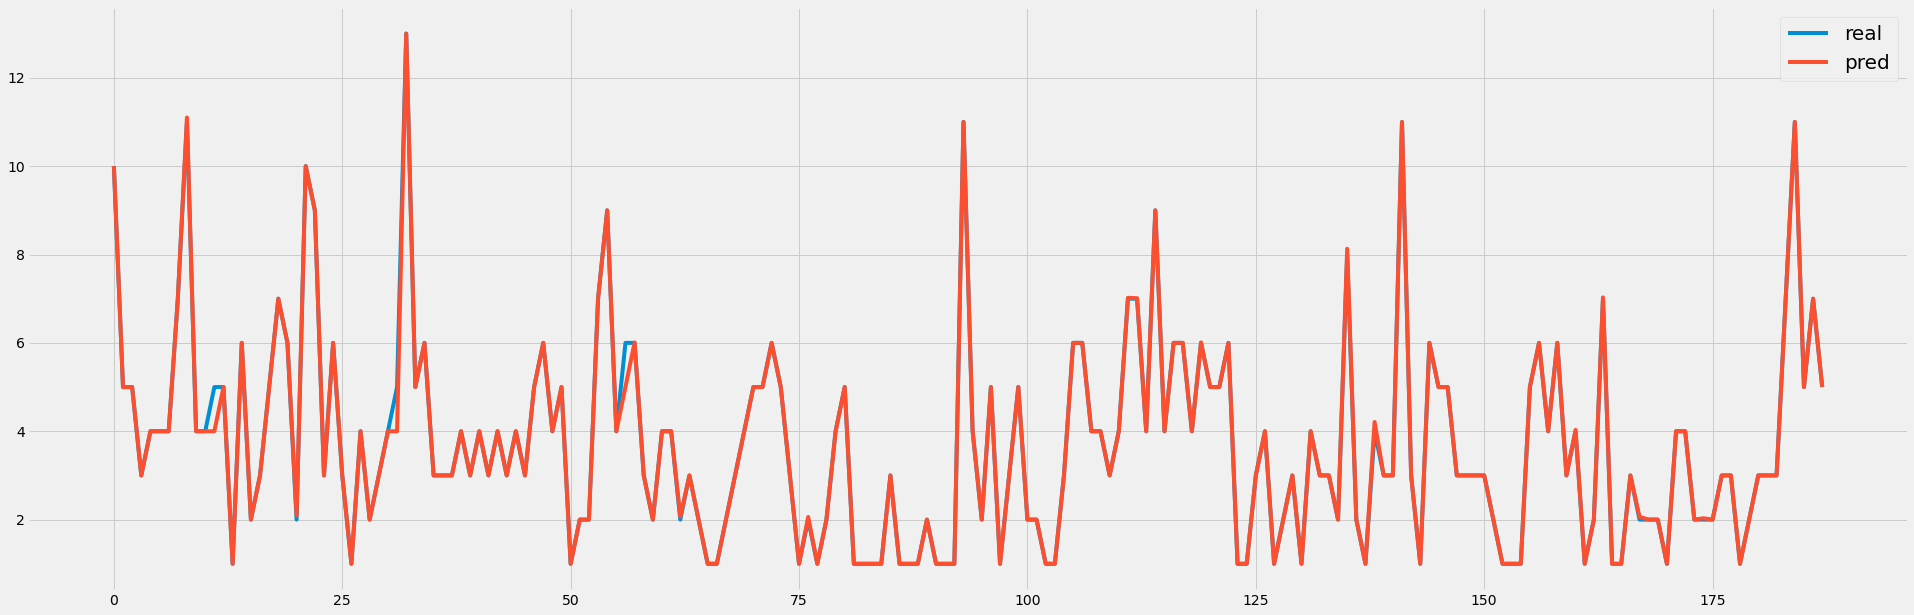

CV 정확도 점수: [0.99972685 0.99978272 0.99968538 0.99917414 0.99991457 0.99910861
 0.99934983 0.99890852 0.99944238 0.99890775]
CV 정확도: 0.999 +/- 0.000


In [33]:
f =['요일', '발생년도', '발생월', '발생일자', '사고내용', '사고유형_대분류', '사고유형',
       '가해자법규위반', '노면상태_대분류', '노면상태', '기상상태', '도로형태']
X_train = new_df2[(new_df2['발생년도']==2018)][f]
y_train = new_df2[(new_df2['발생년도']==2018)]['사고건수']

X_test = new_test[f]
y_test = new_test['사고건수']

forest = RandomForestRegressor(n_estimators=100, 
                                criterion='mse', 
                                random_state=1, 
                                n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
    r2_score(y_train, y_train_pred),
    r2_score(y_test, y_test_pred)))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(30, 10))
plt.plot(y_test[:300], label = 'real')
plt.plot(y_test_pred[:300], label = 'pred')
plt.legend(fontsize = 20)
plt.show()
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

scores = cross_val_score(estimator=forest,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV 정확도 점수: %s' % scores)
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


In [34]:
y_test_pred

array([10.  ,  5.  ,  5.  ,  3.  ,  4.  ,  4.  ,  4.  ,  7.  , 11.1 ,
        4.  ,  4.  ,  4.  ,  5.  ,  1.  ,  6.  ,  2.  ,  3.  ,  5.  ,
        7.  ,  6.  ,  2.09, 10.  ,  9.  ,  3.  ,  6.  ,  3.  ,  1.  ,
        4.  ,  2.  ,  3.  ,  4.  ,  4.  , 13.  ,  5.  ,  6.  ,  3.  ,
        3.  ,  3.  ,  4.  ,  3.  ,  4.  ,  3.  ,  4.  ,  3.  ,  4.  ,
        3.  ,  5.  ,  6.  ,  4.  ,  5.  ,  1.  ,  2.  ,  2.  ,  7.  ,
        9.  ,  4.  ,  5.  ,  6.01,  3.  ,  2.  ,  4.  ,  4.  ,  2.07,
        3.  ,  2.  ,  1.  ,  1.  ,  2.  ,  3.  ,  4.  ,  5.  ,  5.  ,
        6.  ,  5.  ,  3.  ,  1.  ,  2.06,  1.  ,  2.  ,  4.  ,  5.  ,
        1.  ,  1.  ,  1.  ,  1.  ,  3.  ,  1.  ,  1.  ,  1.  ,  2.  ,
        1.  ,  1.  ,  1.  , 11.  ,  4.01,  2.  ,  5.  ,  1.  ,  3.  ,
        5.  ,  2.  ,  2.  ,  1.  ,  1.  ,  3.  ,  6.  ,  6.  ,  4.  ,
        4.  ,  3.  ,  4.  ,  7.02,  7.01,  4.  ,  9.  ,  4.  ,  6.  ,
        6.  ,  4.  ,  6.01,  5.  ,  5.  ,  6.  ,  1.  ,  1.  ,  3.  ,
        4.  ,  1.  ,